In [5]:
from qiskit import *

In [7]:
circuit = QuantumCircuit(3,3)
# QUBIT ORDERING
# q0 = State |psi> that we want to teleport
# q1 = Alice's half of the Bell pair
# q2 = Bob's half of the Bell pair, the destination of the teleportation

# ========================
# Step 0: Create the state to be teleported in qubit 0
circuit.x(0) # qubit 0 is now in state |1>, and this is the state that we want to teleport

circuit.barrier() # just a visual aid

# ========================
# Step 1: create an entangled Bell pair between Alice and Bob (qubits 1 and 2)
circuit.h(1)
circuit.cx(1,2)

circuit.barrier() # just a visual aid

# ========================
# Step 2: Alice applies a series of operations 
# between the state to teleport (qubit 0) and her half of the Bell pair (qubit 1)
circuit.cx(0,1)
circuit.h(0)

circuit.barrier() # just a visual aid

# ========================
# Step 3: Alice measures both qubits 0 and 1
circuit.measure([0, 1], [0, 1]) # results stored in classical bits 0 and 1, respectively

circuit.barrier() # just a visual aid

# ========================
# Step 4: Now that Alice has measured the two qubits, their states have collapsed to 0 and 1. 
# Bob can do operations conditioned on these qubits to his half of the Bell pair
# Note that while we're conditioning Bob's operation on the collapsed qubits 0 and 1, we can
# do teleportation over long distances by transmitting the classical information in classical bits 0 and 1
circuit.cx(1, 2)
circuit.cz(0, 2)

# Step 5: Done! Measure Bob's qubit to find out what state it is in
circuit.measure([2], [2])

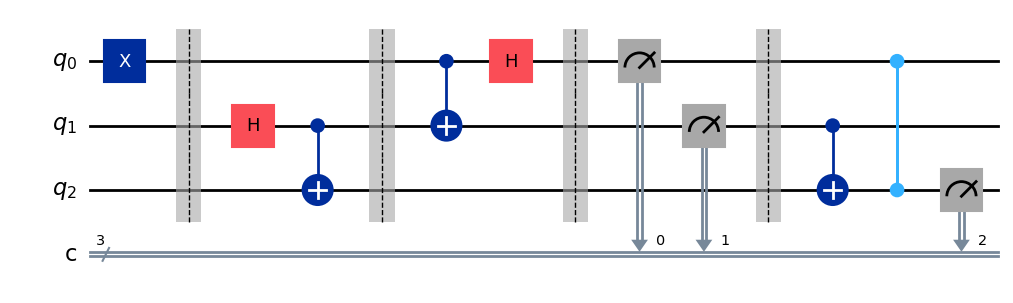

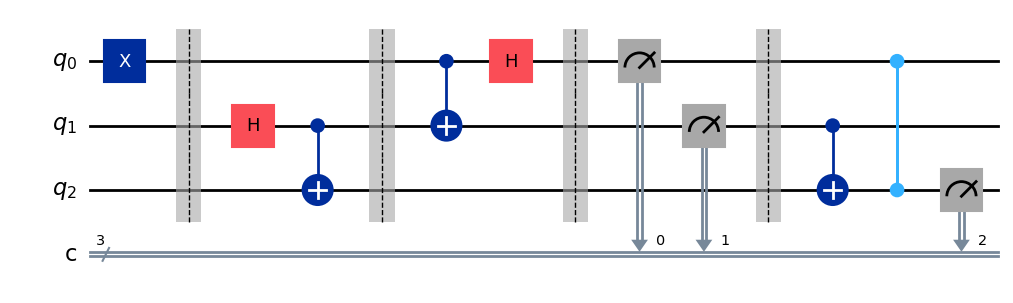

In [8]:
%matplotlib inline
circuit.draw(output='mpl')

     ┌───┐          ┌───┐ ░            ┌─┐   
q_0: ┤ X ├───────■──┤ H ├─░───────■────┤M├───
     ├───┤     ┌─┴─┐└───┘ ░       │ ┌─┐└╥┘   
q_1: ┤ H ├──■──┤ X ├──────░───■───┼─┤M├─╫────
     └───┘┌─┴─┐└───┘      ░ ┌─┴─┐ │ └╥┘ ║ ┌─┐
q_2: ─────┤ X ├───────────░─┤ X ├─■──╫──╫─┤M├
          └───┘           ░ └───┘    ║  ║ └╥┘
c: 3/════════════════════════════════╩══╩══╩═
                                     1  0  2 


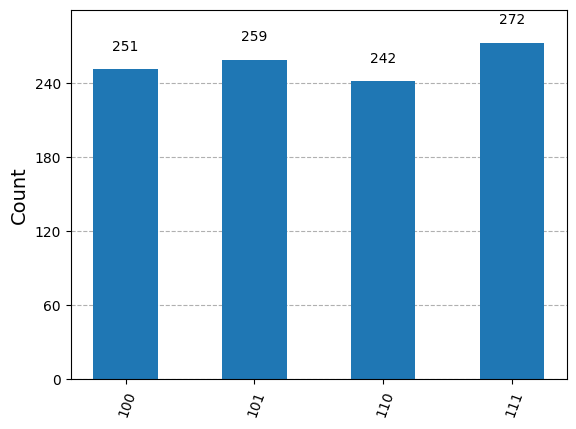

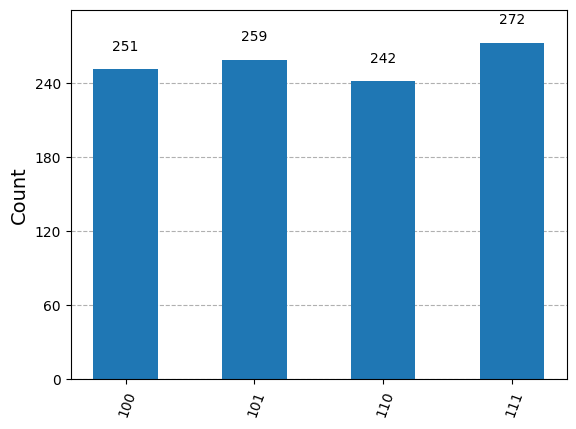

In [9]:
import qiskit as q
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import transpile

# Create a circuit with 3 qubits and 3 classical bits.
circuit = q.QuantumCircuit(3, 3)

# --- Teleportation Circuit Setup ---

# (Optional) Initialize qubit 0 to |1> so we teleport state |1>.
circuit.x(0)

# Step 1: Create an entangled pair between qubits 1 & 2.
circuit.h(1)
circuit.cx(1, 2)

# Step 2: Perform Bell measurement on qubits 0 and 1.
circuit.cx(0, 1)
circuit.h(0)

# Barrier separating measurement and correction.
circuit.barrier()

# Step 3: Apply correction operations.
circuit.cx(1, 2)
circuit.cz(0, 2)

# Step 4: Measure all qubits.
# Mapping: Q0 -> c0, Q1 -> c1, Q2 -> c2.
circuit.measure([0, 1, 2], [0, 1, 2])

print(circuit)

# --- Simulation using AerSimulator ---
backend = AerSimulator()
# Transpile the circuit for the chosen backend.
tqc = transpile(circuit, backend=backend)
# Run the circuit with 1024 shots.
job = backend.run(tqc, shots=1024)
result = job.result()

# Get counts from the result.
counts = result.get_counts()
plot_histogram(counts)
